### Importing the data

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
## importing the data
## pressure sensors are imported as PS. There are around 6 pressure sensors. They are named as ps1, ps2, ps3, ps4, ps5, ps6. 

df_ps1 = pd.read_csv('PS1.txt', delimiter = '\t', header = None)
df_ps2 = pd.read_csv('PS2.txt', delimiter = '\t', header = None)
df_ps3 = pd.read_csv('PS3.txt', delimiter = '\t', header = None)
df_ps4 = pd.read_csv('PS4.txt', delimiter = '\t', header = None)
df_ps5 = pd.read_csv('PS5.txt', delimiter = '\t', header = None)
df_ps6 = pd.read_csv('PS6.txt', delimiter = '\t', header = None)


In [3]:
## cooling efficiency and cooling power are imported as ce and cp respectively. 

df_ce = pd.read_csv('CE.txt',delimiter = '\t', header = None)
df_cp = pd.read_csv('CP.txt', delimiter = '\t', header = None)


In [4]:
# temperature sensors are imported as ts. There are around 4 pressure sensors. They are named as ts1, ts2, ts3, ts4.

df_ts1 = pd.read_csv('TS1.txt', delimiter = '\t', header = None)
df_ts2 = pd.read_csv('TS2.txt', delimiter = '\t', header = None)
df_ts3 = pd.read_csv('TS3.txt', delimiter = '\t', header = None)
df_ts4 = pd.read_csv('TS4.txt', delimiter = '\t', header = None)


In [5]:
# flow sensors are imported as fs. There are around 2 pressure sensors. They are named as fs1, fs2.

df_fs1 = pd.read_csv('FS1.txt', delimiter = '\t', header = None)
df_fs2 = pd.read_csv('FS2.txt', delimiter = '\t', header = None)


In [6]:
# motor power sensors is imported as eps. 
# vibration sensors is imported as vs
# efficiency power is imported as se

df_eps1 = pd.read_csv('EPS1.txt', delimiter = '\t', header = None)
df_se = pd.read_csv('SE.txt', delimiter = '\t', header = None)
df_vs1 = pd.read_csv('VS1.txt', delimiter = '\t', header = None)



In [7]:
## function for defining variables like ps1_1, ps1_2 for 17 sensors with different sampling rates

def col(n, var):
    l = []
    for i in range(1,n):
        temp = str(var) + '_' + '%d' %i
        l.append(temp)
    return l


In [8]:
# 
df_ps1.columns = col(6001,'ps1')
df_ps2.columns = col(6001,'ps2')
df_ps3.columns = col(6001,'ps3')
df_ps4.columns = col(6001,'ps4')
df_ps5.columns = col(6001,'ps5')
df_ps6.columns = col(6001,'ps6')




In [9]:
df_ts1.columns = col(61,'ts1')
df_ts2.columns = col(61,'ts2')
df_ts3.columns = col(61,'ts3')
df_ts4.columns = col(61,'ts4')


In [10]:
df_eps1.columns = col(6001,'eps1')

In [11]:
df_fs1.columns = col(601,'fs1')
df_fs2.columns = col(601,'fs2')

In [12]:
df_vs1.columns = col(61,'vs1')

In [13]:
df_ce.columns = col(61,'ce')

In [14]:
df_cp.columns = col(61,'cp')

In [15]:
df_se.columns = col(61,'se')

In [16]:
df_ps = pd.concat([df_ps1, df_ps2, df_ps3, df_ps4, df_ps5, df_ps6], axis = 1)
df_ts = pd.concat([df_ts1, df_ts2, df_ts3, df_ts4], axis = 1)
df_fs = pd.concat([df_fs1, df_fs2], axis = 1)
df_vir = pd.concat([df_cp, df_ce, df_eps1, df_se, df_vs1], axis = 1)


In [17]:
df = pd.concat([df_ps, df_ts, df_fs, df_vir], axis = 1)
df.head()

,ps1_1,ps1_2,ps1_3,ps1_4,ps1_5,ps1_6,ps1_7,ps1_8,ps1_9,ps1_10,...,vs1_51,vs1_52,vs1_53,vs1_54,vs1_55,vs1_56,vs1_57,vs1_58,vs1_59,vs1_60
0,151.47,151.45,151.52,151.27,150.80,150.69,153.89,154.67,152.88,153.82,...,0.554,0.552,0.545,0.553,0.553,0.539,0.544,0.545,0.535,0.543
1,151.11,151.12,151.16,150.92,150.70,150.62,152.40,153.21,152.81,153.53,...,0.555,0.547,0.548,0.544,0.536,0.542,0.540,0.533,0.531,0.534
2,150.81,150.79,150.84,150.65,150.35,150.23,152.03,152.81,152.44,153.27,...,0.543,0.544,0.543,0.554,0.544,0.544,0.545,0.544,0.530,0.534
3,150.48,150.47,150.52,150.31,150.04,149.98,151.63,152.48,152.24,152.94,...,0.549,0.538,0.553,0.543,0.553,0.555,0.544,0.543,0.543,0.542
4,150.41,150.35,150.24,150.12,149.87,149.71,151.64,152.37,151.78,152.68,...,0.546,0.546,0.544,0.552,0.539,0.540,0.549,0.542,0.533,0.537


In [18]:
#pip install tsfresh

### Function for window statistical features

In [19]:
df_ps1.filter(regex="ps_mean_.*").head()

""
0
1
2
3
4


In [20]:
def sensor_statistic(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].mean(axis=1)

    return df_statistic



In [21]:
window_length = 300
ps1_window_mean  = sensor_statistic(df_ps1, window_length, 'ps1_mean_')
ps1_window_mean.head()

20 300 (2205, 6000)


,ps1_mean_0,ps1_mean_1,ps1_mean_2,ps1_mean_3,ps1_mean_4,ps1_mean_5,ps1_mean_6,ps1_mean_7,ps1_mean_8,ps1_mean_9,ps1_mean_10,ps1_mean_11,ps1_mean_12,ps1_mean_13,ps1_mean_14,ps1_mean_15,ps1_mean_16,ps1_mean_17,ps1_mean_18,ps1_mean_19
0,183.946933,191.312800,191.308500,155.942933,146.051067,146.0163,152.208400,156.241267,156.245767,158.976367,166.376067,166.299367,166.323100,157.015733,156.244500,156.234600,153.217267,151.216800,151.150167,151.140803
1,185.775900,191.284900,191.260800,155.956533,146.052967,145.9401,152.111100,156.058400,156.012667,158.820000,166.115867,166.038167,166.067700,156.767200,156.052467,156.055600,153.014300,150.917100,150.892300,150.871538
2,185.626600,191.214333,191.195067,155.712000,145.909233,145.6195,151.754600,155.792567,155.676700,158.509800,165.923133,165.855000,165.867533,156.476667,155.711100,155.687600,152.700033,150.579467,150.580633,150.562007
3,185.483533,191.158667,191.118333,155.526033,145.744933,145.4626,151.626400,155.556767,155.522467,158.327000,165.764400,165.712733,165.725933,156.226467,155.581433,155.538067,152.519767,150.391467,150.411567,150.362809
4,185.402000,191.081567,191.074333,155.349633,145.572033,145.3456,151.441667,155.363600,155.303533,158.140467,165.539233,165.481167,165.517300,155.970933,155.306733,155.345367,152.283800,150.134200,150.177667,150.177826


In [22]:
window_length = 300
ps2_window_mean  = sensor_statistic(df_ps2, window_length, 'ps2_mean_')

ps3_window_mean  = sensor_statistic(df_ps3, window_length, 'ps3_mean_')

ps4_window_mean  = sensor_statistic(df_ps4, window_length, 'ps4_mean_')

ps5_window_mean  = sensor_statistic(df_ps5, window_length, 'ps5_mean_')

ps6_window_mean  = sensor_statistic(df_ps6, window_length, 'ps6_mean_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [23]:
window_length = 3
ts1_window_mean  = sensor_statistic(df_ts1, window_length, 'ts1_mean_')

ts2_window_mean  = sensor_statistic(df_ts2, window_length,'ts2_mean_')

ts3_window_mean  = sensor_statistic(df_ts3, window_length,'ts3_mean_')

ts4_window_mean  = sensor_statistic(df_ts4, window_length,'ts4_mean_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [24]:
window_length = 30
fs1_window_mean  = sensor_statistic(df_fs1, window_length,'fs1_mean_')

fs2_window_mean  = sensor_statistic(df_fs2, window_length,'fs2_mean_')


20 30 (2205, 600)
20 30 (2205, 600)


In [25]:
window_length = 3

ce_window_mean  = sensor_statistic(df_ce, window_length,'ce_mean_')

cp_window_mean  = sensor_statistic(df_cp, window_length,'cp_mean_')

se_window_mean  = sensor_statistic(df_se, window_length,'se_mean_')

vs1_window_mean  = sensor_statistic(df_vs1, window_length,'vs1_mean_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [26]:
window_length = 300
eps1_window_mean  = sensor_statistic(df_eps1, window_length,'eps1_mean_')


20 300 (2205, 6000)


In [27]:
mean_data = pd.concat([ps1_window_mean, ps2_window_mean, ps3_window_mean, ps4_window_mean, ps5_window_mean, 
                      ps6_window_mean, ts1_window_mean, ts2_window_mean, ts3_window_mean, ts4_window_mean,
                      fs1_window_mean, fs2_window_mean, eps1_window_mean, vs1_window_mean, ce_window_mean, 
                      cp_window_mean, se_window_mean], axis = 1)

In [28]:
mean_data.shape

(2205, 340)

### Calculate median for all sensors

In [29]:
def sensor_median(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].median(axis=1)

    return df_statistic



In [30]:
window_length = 300

ps1_window_median  = sensor_median(df_ps1, window_length, 'ps1_median_')

ps2_window_median  = sensor_median(df_ps2, window_length, 'ps2_median_')

ps3_window_median  = sensor_median(df_ps3, window_length, 'ps3_median_')

ps4_window_median  = sensor_median(df_ps4, window_length, 'ps4_median_')

ps5_window_median  = sensor_median(df_ps5, window_length, 'ps5_median_')

ps6_window_median  = sensor_median(df_ps6, window_length, 'ps6_median_')

eps1_window_median  = sensor_median(df_eps1, window_length,'eps1_median_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [31]:
window_length = 3
ts1_window_median  = sensor_median(df_ts1, window_length, 'ts1_median_')

ts2_window_median  = sensor_median(df_ts2, window_length,'ts2_median_')

ts3_window_median  = sensor_median(df_ts3, window_length,'ts3_median_')

ts4_window_median  = sensor_median(df_ts4, window_length,'ts4_median_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [32]:
window_length = 30
fs1_window_median  = sensor_median(df_fs1, window_length,'fs1_median_')

fs2_window_median  = sensor_median(df_fs2, window_length,'fs2_median_')


20 30 (2205, 600)
20 30 (2205, 600)


In [33]:
window_length = 3

ce_window_median  = sensor_median(df_ce, window_length,'ce_median_')

cp_window_median  = sensor_median(df_cp, window_length,'cp_median_')

se_window_median  = sensor_median(df_se, window_length,'se_median_')

vs1_window_median  = sensor_median(df_vs1, window_length,'vs1_median_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [34]:
median_data = pd.concat([ps1_window_median, ps2_window_median, ps3_window_median, ps4_window_median, ps5_window_median,
                                    ps6_window_median, ts1_window_median, ts2_window_median, ts3_window_median, ts4_window_median,
                                    fs1_window_median, fs2_window_median, eps1_window_median, vs1_window_median, ce_window_median,
                                    cp_window_median, se_window_median], axis = 1)
                         

In [35]:
median_data.shape

(2205, 340)

### Finding the maximum 

In [36]:
def sensor_max(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].max(axis=1)

    return df_statistic



In [37]:
window_length = 300

ps1_window_max  = sensor_max(df_ps1, window_length, 'ps1_max_')

ps2_window_max  = sensor_max(df_ps2, window_length, 'ps2_max_')

ps3_window_max  = sensor_max(df_ps3, window_length, 'ps3_max_')

ps4_window_max  = sensor_max(df_ps4, window_length, 'ps4_max_')

ps5_window_max  = sensor_max(df_ps5, window_length, 'ps5_max_')

ps6_window_max  = sensor_max(df_ps6, window_length, 'ps6_max_')

eps1_window_max  = sensor_max(df_eps1, window_length,'eps1_max_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [38]:
window_length = 3
ts1_window_max  = sensor_max(df_ts1, window_length, 'ts1_max_')

ts2_window_max  = sensor_max(df_ts2, window_length,'ts2_max_')

ts3_window_max  = sensor_max(df_ts3, window_length,'ts3_max_')

ts4_window_max  = sensor_max(df_ts4, window_length,'ts4_max_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [39]:
window_length = 30
fs1_window_max  = sensor_max(df_fs1, window_length,'fs1_max_')

fs2_window_max  = sensor_max(df_fs2, window_length,'fs2_max_')


20 30 (2205, 600)
20 30 (2205, 600)


In [40]:
window_length = 3

ce_window_max  = sensor_max(df_ce, window_length,'ce_max_')

cp_window_max  = sensor_max(df_cp, window_length,'cp_max_')

se_window_max  = sensor_max(df_se, window_length,'se_max_')

vs1_window_max  = sensor_max(df_vs1, window_length,'vs1_max_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [41]:
max_data = pd.concat([ps1_window_max, ps2_window_max, ps3_window_max, ps4_window_max, ps5_window_max,
                      ps6_window_max, ts1_window_max, ts2_window_max, ts3_window_max, ts4_window_max,
                      fs1_window_max, fs2_window_max, eps1_window_max, vs1_window_max,
                      ce_window_max, cp_window_max, se_window_max], axis = 1)

In [42]:
max_data.shape

(2205, 340)

### Calculating the min 

In [43]:
def sensor_min(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].min(axis=1)

    return df_statistic


In [44]:
window_length = 300

ps1_window_min  = sensor_min(df_ps1, window_length, 'ps1_min_')

ps2_window_min  = sensor_max(df_ps2, window_length, 'ps2_min_')

ps3_window_min  = sensor_max(df_ps3, window_length, 'ps3_min_')

ps4_window_min  = sensor_max(df_ps4, window_length, 'ps4_min_')

ps5_window_min  = sensor_max(df_ps5, window_length, 'ps5_min_')

ps6_window_min  = sensor_max(df_ps6, window_length, 'ps6_min_')

eps1_window_min  = sensor_max(df_eps1, window_length,'eps1_min_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [45]:
window_length = 3
ts1_window_min  = sensor_min(df_ts1, window_length, 'ts1_min_')

ts2_window_min  = sensor_min(df_ts2, window_length,'ts2_min_')

ts3_window_min  = sensor_min(df_ts3, window_length,'ts3_min_')

ts4_window_min  = sensor_min(df_ts4, window_length,'ts4_min_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [46]:
window_length = 30
fs1_window_min  = sensor_min(df_fs1, window_length,'fs1_min_')

fs2_window_min  = sensor_min(df_fs2, window_length,'fs2_min_')


20 30 (2205, 600)
20 30 (2205, 600)


In [47]:
window_length = 3

ce_window_min  = sensor_min(df_ce, window_length,'ce_min_')

cp_window_min  = sensor_min(df_cp, window_length,'cp_min_')

se_window_min  = sensor_min(df_se, window_length,'se_min_')

vs1_window_min  = sensor_min(df_vs1, window_length,'vs1_min_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [48]:
Min_data = pd.concat([ps1_window_min, ps2_window_min, ps3_window_min, ps4_window_min, ps5_window_min,  ps6_window_min, 
                      ts1_window_min, ts2_window_min, ts3_window_min, ts4_window_min, 
                      fs1_window_min, fs2_window_min, eps1_window_min, vs1_window_min, 
                      ce_window_min, cp_window_min, se_window_min], axis = 1)

In [49]:
import statistics as st

### Calculate the variance 

In [50]:
def sensor_variance(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].var(axis=1)

    return df_statistic


In [51]:
window_length = 300

ps1_window_variance  = sensor_variance(df_ps1, window_length, 'ps1_variance_')

ps2_window_variance  = sensor_variance(df_ps2, window_length, 'ps2_variance_')

ps3_window_variance  = sensor_variance(df_ps3, window_length, 'ps3_variance_')

ps4_window_variance  = sensor_variance(df_ps4, window_length, 'ps4_variance_')

ps5_window_variance  = sensor_variance(df_ps5, window_length, 'ps5_variance_')

ps6_window_variance  = sensor_variance(df_ps6, window_length, 'ps6_variance_')

eps1_window_variance  = sensor_variance(df_eps1, window_length,'eps1_variance_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [52]:
window_length = 3
ts1_window_variance  = sensor_variance(df_ts1, window_length, 'ts1_variance_')

ts2_window_variance  = sensor_variance(df_ts2, window_length,'ts2_variance_')

ts3_window_variance  = sensor_variance(df_ts3, window_length,'ts3_variance_')

ts4_window_variance  = sensor_variance(df_ts4, window_length,'ts4_variance_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [53]:
window_length = 30

fs1_window_variance  = sensor_variance(df_fs1, window_length,'fs1_variance_')

fs2_window_variance  = sensor_variance(df_fs2, window_length,'fs2_variance_')


20 30 (2205, 600)
20 30 (2205, 600)


In [54]:
window_length = 3

ce_window_variance  = sensor_variance(df_ce, window_length,'ce_variance_')

cp_window_variance  = sensor_variance(df_cp, window_length,'cp_variance_')

se_window_variance  = sensor_variance(df_se, window_length,'se_variance_')

vs1_window_variance  = sensor_variance(df_vs1, window_length,'vs1_variance_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [55]:
variance_data = pd.concat([ps1_window_variance, ps2_window_variance, ps3_window_variance, ps4_window_variance, ps5_window_variance,  ps6_window_variance, 
                           ts1_window_variance, ts2_window_variance, ts3_window_variance, ts4_window_variance, 
                           fs1_window_variance, fs2_window_variance, eps1_window_variance, vs1_window_variance, 
                           ce_window_variance, cp_window_variance, se_window_variance], axis = 1)

### Calculating standard deviation

In [56]:
def sensor_std(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].std(axis=1)

    return df_statistic


In [57]:
window_length = 300

ps1_window_std  = sensor_std(df_ps1, window_length, 'ps1_std_')

ps2_window_std  = sensor_std(df_ps2, window_length, 'ps2_std_')

ps3_window_std  = sensor_std(df_ps3, window_length, 'ps3_std_')

ps4_window_std  = sensor_std(df_ps4, window_length, 'ps4_std_')

ps5_window_std  = sensor_std(df_ps5, window_length, 'ps5_std_')

ps6_window_std  = sensor_std(df_ps6, window_length, 'ps6_std_')

eps1_window_std  = sensor_std(df_eps1, window_length,'eps1_std_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [58]:
window_length = 3
ts1_window_std  = sensor_std(df_ts1, window_length, 'ts1_std_')

ts2_window_std  = sensor_std(df_ts2, window_length,'ts2_std_')

ts3_window_std  = sensor_std(df_ts3, window_length,'ts3_std_')

ts4_window_std  = sensor_std(df_ts4, window_length,'ts4_std_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [59]:
window_length = 30

fs1_window_std  = sensor_std(df_fs1, window_length,'fs1_std_')

fs2_window_std  = sensor_std(df_fs2, window_length,'fs2_std_')


20 30 (2205, 600)
20 30 (2205, 600)


In [60]:
window_length = 3

ce_window_std  = sensor_std(df_ce, window_length,'ce_std_')

cp_window_std  = sensor_std(df_cp, window_length,'cp_std_')

se_window_std  = sensor_std(df_se, window_length,'se_std_')

vs1_window_std  = sensor_std(df_vs1, window_length,'vs1_std_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [61]:
std_data = pd.concat([ps1_window_std, ps2_window_std, ps3_window_std, ps4_window_std, ps5_window_std,  ps6_window_std,
                      ts1_window_std, ts2_window_std, ts3_window_std, ts4_window_std, fs1_window_std, fs2_window_std,
                      eps1_window_std, vs1_window_std, ce_window_std, cp_window_std, se_window_std], axis = 1)

### Calculating IQR

In [62]:
from scipy.stats import iqr


def sensor_iqr(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
        
            df_statistic[str(sensor)+str(i)] = iqr(dataframe[windows[i]],axis=1)

    return df_statistic


In [63]:
window_length = 300

ps1_window_iqr  = sensor_iqr(df_ps1, window_length, 'ps1_iqr_')

ps2_window_iqr  = sensor_iqr(df_ps2, window_length, 'ps2_iqr_')

ps3_window_iqr  = sensor_iqr(df_ps3, window_length, 'ps3_iqr_')

ps4_window_iqr  = sensor_iqr(df_ps4, window_length, 'ps4_iqr_')

ps5_window_iqr  = sensor_iqr(df_ps5, window_length, 'ps5_iqr_')

ps6_window_iqr  = sensor_iqr(df_ps6, window_length, 'ps6_iqr_')

eps1_window_iqr  = sensor_iqr(df_eps1, window_length,'eps1_iqr_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [64]:
window_length = 3
ts1_window_iqr  = sensor_iqr(df_ts1, window_length, 'ts1_iqr_')

ts2_window_iqr  = sensor_iqr(df_ts2, window_length,'ts2_iqr_')

ts3_window_iqr  = sensor_iqr(df_ts3, window_length,'ts3_iqr_')

ts4_window_iqr  = sensor_iqr(df_ts4, window_length,'ts4_iqr_')

20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [65]:
window_length = 30

fs1_window_iqr  = sensor_iqr(df_fs1, window_length,'fs1_iqr_')

fs2_window_iqr  = sensor_iqr(df_fs2, window_length,'fs2_iqr_')


20 30 (2205, 600)
20 30 (2205, 600)


In [66]:
window_length = 3

ce_window_iqr  = sensor_iqr(df_ce, window_length,'ce_iqr_')

cp_window_iqr  = sensor_iqr(df_cp, window_length,'cp_iqr_')

se_window_iqr  = sensor_iqr(df_se, window_length,'se_iqr_')

vs1_window_iqr  = sensor_iqr(df_vs1, window_length,'vs1_iqr_')

20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [67]:
iqr_data = pd.concat([ps1_window_iqr, ps2_window_iqr, ps3_window_iqr, ps4_window_iqr, ps5_window_iqr,  ps6_window_iqr,
                      ts1_window_iqr, ts2_window_iqr, ts3_window_iqr, ts4_window_iqr, fs1_window_iqr, fs2_window_iqr,
                      eps1_window_iqr, vs1_window_iqr, ce_window_iqr, cp_window_iqr, se_window_iqr], axis = 1)

### Merge all datasets to get the final dataset

In [68]:
Final = pd.concat([median_data, max_data, Min_data, std_data, variance_data, iqr_data], axis = 1)

In [69]:
Final.shape

(2205, 2040)

In [70]:
profile = pd.read_csv('profile.txt', delimiter = '\t', header = None)

In [71]:
profile.columns = ["Cooler Condition","Valve Condition","Internal Pump Leakage","Hydraulic Accumulator","Stable Flag"]

In [72]:
Final_target = pd.concat([Final, profile], axis = 1)

In [73]:
Final_target.shape

(2205, 2045)

In [74]:
profile_stable = profile['Stable Flag']

# Stable Flag Classification



## Train test split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(Final, profile_stable, train_size=0.7, test_size=0.3, random_state=42,stratify = profile_stable)

In [77]:
y_traindf = pd.DataFrame(y_train)
y_testdf = pd.DataFrame(y_test)

print(y_train.value_counts())
print(y_test.value_counts())

0    1014
1     529
Name: Stable Flag, dtype: int64
0    435
1    227
Name: Stable Flag, dtype: int64


### Balancing the classes using SMOTE

In [78]:

## SMOTE method is used to balance data
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=45, k_neighbors=5)
X_train, y_train = smt.fit_sample(X_train,y_train)
X_train = pd.DataFrame(X_train, columns=X_train.columns)

#y_train_smt = pd.DataFrame(y_train_smt)

X_train.head()

,ps1_median_0,ps1_median_1,ps1_median_2,ps1_median_3,ps1_median_4,ps1_median_5,ps1_median_6,ps1_median_7,ps1_median_8,ps1_median_9,...,se_iqr_10,se_iqr_11,se_iqr_12,se_iqr_13,se_iqr_14,se_iqr_15,se_iqr_16,se_iqr_17,se_iqr_18,se_iqr_19
0,190.580,190.60,190.60,146.850,143.600,143.52,153.145,153.44,153.430,153.480,...,0.1790,0.084,5.1505,5.4955,0.0195,0.0450,2.7295,0.0695,0.0000,0.0345
1,191.490,191.47,191.47,147.150,146.505,146.42,156.350,156.46,156.440,156.440,...,0.1360,0.070,3.7870,4.2245,0.0415,0.0070,2.2930,0.1220,0.1375,0.1230
2,191.540,191.49,191.51,147.600,146.810,146.74,156.490,156.65,156.555,156.600,...,0.1180,0.108,3.7765,4.3085,0.0300,0.1150,2.4645,0.0640,0.1320,0.0140
3,189.575,189.66,189.63,142.125,140.880,140.84,150.225,150.36,150.380,150.380,...,0.0145,0.015,0.2725,0.0015,0.0105,0.0005,12.6510,0.3435,0.1055,0.1280
4,190.710,190.73,190.69,144.030,143.250,143.20,153.100,153.13,153.110,153.195,...,0.0065,0.081,4.4225,4.8550,0.1285,0.0585,2.6345,0.0445,0.1205,0.0725


## Standardisation of Data

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler() ## x-mean/std

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [82]:
X_train_scaled.columns = Final.columns 
X_test_scaled.columns = Final.columns 

In [83]:
print(X_test_scaled.shape)
print(X_train_scaled.shape)

(662, 2040)
(2028, 2040)




### Building an Logistic Regression classifier for Stable Flag

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV

from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [85]:
l_classifier = LogisticRegression(random_state=100, max_iter= 400)

In [86]:
l_classifier.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=400, random_state=100)

In [87]:
def evaluate_model(dt_classifier,y_train,X_train,y_test,X_test):
    print("Train Precision :", (precision_score(y_train, dt_classifier.predict(X_train)))*100)
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Precision :", (precision_score(y_test, dt_classifier.predict(X_test)))*100)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [88]:
evaluate_model(l_classifier, y_train, X_train_scaled, y_test, X_test_scaled)

Train Precision : 100.0
Train Confusion Matrix:
[[1014    0]
 [   0 1014]]
--------------------------------------------------
Test Precision : 88.9795918367347
Test Confusion Matrix:
[[408  27]
 [  9 218]]


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, l_classifier.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       435
           1       0.89      0.96      0.92       227

    accuracy                           0.95       662
   macro avg       0.93      0.95      0.94       662
weighted avg       0.95      0.95      0.95       662



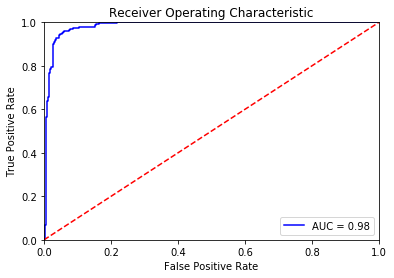

In [90]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = l_classifier.predict_proba(X_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Performance of noise test data

In [ ]:
import numpy as np 
mu, sigma = 0, np.std(X_test_scaled)*0.20
noise = np.random.normal(mu, sigma, X_test_scaled.shape)
noise.shape

X_testscaled_noise = X_test_scaled + noise

In [105]:
print(classification_report(y_test, l_classifier.predict(X_testscaled_noise)))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       435
           1       0.88      0.95      0.92       227

    accuracy                           0.94       662
   macro avg       0.93      0.94      0.93       662
weighted avg       0.94      0.94      0.94       662



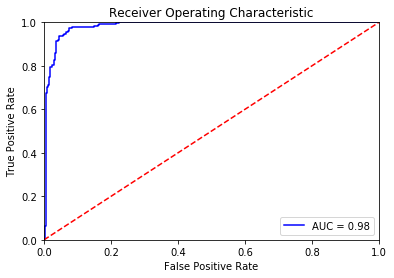

In [106]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = l_classifier.predict_proba(X_testscaled_noise)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Using RFE for dimension reduction

In [ ]:
ml1=l_classifier.fit(X_train_scaled,y_train)
from sklearn.feature_selection import RFE
rfe = RFE(ml1, 20)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train_scaled, y_train)

In [ ]:
rfe.support_

In [ ]:
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

In [ ]:
rfecol = X_train_scaled.columns[rfe.support_] 
X_train_scaled.columns[~rfe.support_]


In [ ]:
X_train_scaledRFE = pd.DataFrame(X_train_scaled[rfecol])
X_test_scaledRFE = pd.DataFrame(X_test_scaled[rfecol])

In [ ]:
l_classifier.fit(X_train_scaledRFE,y_train)

In [ ]:
evaluate_model(l_classifier, y_train, X_train_scaledRFE, y_test, X_test_scaledRFE)

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = l_classifier.predict_proba(X_test_scaledRFE)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Building an RF classifier for Stable Flag

In [91]:
rfc=RandomForestClassifier(n_estimators=100,random_state=1)

In [92]:
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
print(classification_report(y_test, rfc.predict(X_test_scaled)))

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(X_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Hypertune the parameters 

In [93]:
from sklearn.metrics import classification_report
# Importing required packages for visualization
from IPython.display import Image  

from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.model_selection import GridSearchCV

In [94]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1 , class_weight = 'balanced')

In [95]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [20,50,100],
    'n_estimators': [10, 30, 50, 100, 200]
}

## maximum depth is 1,2,5,10,20
## minimum sample leaf is 5,10,20,50,100
## maximum no. of features is 2,3,4
## no. of trees is 10, 30,50,100,200

In [96]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = classifier_rf, param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "precision")

In [97]:
%%time
grid_search.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 12.5min finished


Wall time: 12min 33s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [20, 50, 100],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='precision', verbose=1)

In [98]:
rf_best = grid_search.best_estimator_ ## best estimator is assigned to rf_best
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=20,
                       min_samples_leaf=5, n_estimators=30, n_jobs=-1,
                       random_state=42)

In [99]:
print(classification_report(y_test, rf_best.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       435
           1       1.00      0.96      0.98       227

    accuracy                           0.99       662
   macro avg       0.99      0.98      0.98       662
weighted avg       0.99      0.99      0.99       662



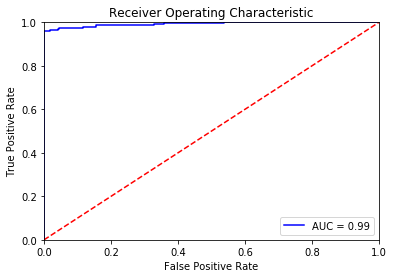

In [101]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf_best.predict_proba(X_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Performance of rf on noise dataset

In [102]:
import numpy as np 
mu, sigma = 0, np.std(X_test_scaled)*0.20
noise = np.random.normal(mu, sigma, X_test_scaled.shape)
noise.shape

X_testscaled_noise = X_test_scaled + noise

In [103]:
print(classification_report(y_test, rf_best.predict(X_testscaled_noise)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       435
           1       0.90      0.86      0.88       227

    accuracy                           0.92       662
   macro avg       0.91      0.90      0.91       662
weighted avg       0.92      0.92      0.92       662



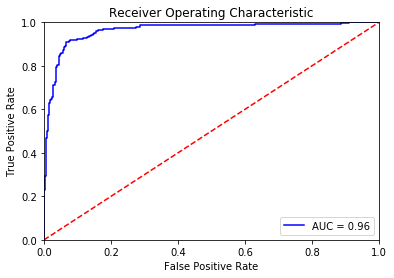

In [104]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf_best.predict_proba(X_testscaled_noise)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# PCA on multivariate Time series 

Source : https://github.com/ansjin/blogs/blob/master/Dimensionality%20Reduction/Dimensionality%20Reduction%20using%20PCA%20on%20multivariate%20timeseries%20data.ipynb

In [107]:
from sklearn.decomposition import PCA

In [108]:
pca = PCA(random_state=42)
X_train_pca = pca.fit(X_train_scaled)

In [109]:
pca.components_

array([[-3.35354454e-02, -3.35614020e-02, -3.35648480e-02, ...,
         3.22031867e-03,  5.59425194e-03,  6.59240676e-03],
       [-2.21087124e-03, -1.37279743e-03, -6.68184559e-04, ...,
         2.80047248e-03, -1.32888377e-03, -7.02712880e-03],
       [-1.13450549e-02, -1.16695044e-02, -1.19923746e-02, ...,
        -1.09119898e-02, -3.94448593e-03,  8.09179577e-03],
       ...,
       [-1.20175290e-05, -4.00530009e-04,  4.03664188e-04, ...,
        -1.92384904e-02, -1.37004599e-02,  9.98868107e-03],
       [-2.14041835e-03,  1.90544406e-02, -9.85610799e-03, ...,
        -4.34556613e-03,  1.38990707e-02,  7.21287206e-03],
       [-2.92177175e-05,  4.49626817e-03,  5.68205508e-03, ...,
        -7.88868536e-03,  1.96916826e-02,  4.19707119e-02]])

In [110]:
pca.explained_variance_ratio_

array([4.10540635e-01, 1.26690804e-01, 2.56043287e-02, ...,
       1.90735878e-33, 7.17541344e-34, 2.28086557e-34])

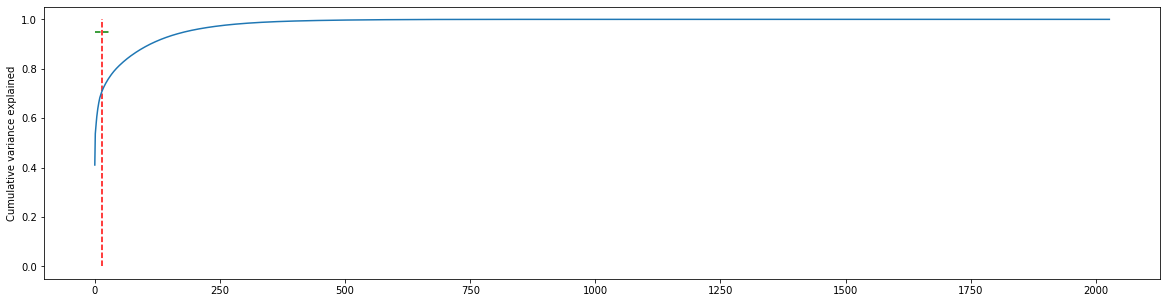

In [113]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[20,5])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [124]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)


In [125]:
X_test_pca.shape

(662, 20)

### SVM +PCA

In [126]:
X_train_pca.shape

(2028, 20)

In [115]:
svc=SVC(kernel="rbf",probability=True)

In [128]:
svc.fit(X_train_pca,y_train)

SVC(probability=True)

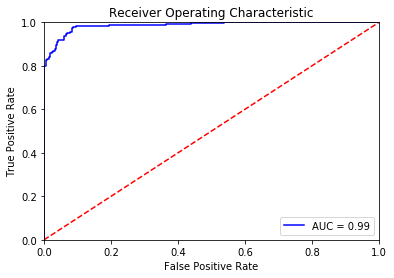

In [129]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = svc.predict_proba(X_test_pca)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [133]:
print(classification_report(y_test, svc.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       435
           1       0.92      0.90      0.91       227

    accuracy                           0.94       662
   macro avg       0.94      0.93      0.93       662
weighted avg       0.94      0.94      0.94       662



## Noise introduced

In [131]:
import numpy as np 
mu, sigma = 0, np.std(X_test_pca)*0.20
noise = np.random.normal(mu, sigma, X_test_pca.shape)

X_testnoise_pca = X_test_pca + noise

In [132]:
print(classification_report(y_test, svc.predict(X_testnoise_pca)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       435
           1       0.93      0.90      0.91       227

    accuracy                           0.94       662
   macro avg       0.94      0.93      0.93       662
weighted avg       0.94      0.94      0.94       662



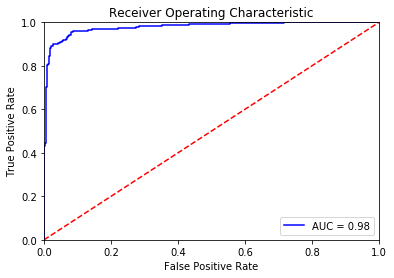

In [134]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = svc.predict_proba(X_testnoise_pca)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()